Clasificación
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Definición del problema

Se tiene una muestra de 15 ejemplos para los cuales se han medido sus características $x_1$ y $x_2$ y su respectiva clase.

    #     x1      x2   Clase
    ------------------------
     1  10.67   14.70    A
     2   9.74   13.79    A 
     3  10.23   14.30    A
     4  11.17   15.53    A
     5  10.41   15.08    A
     6  10.87    6.81    B
     7  11.95    6.05    B
     8  12.77    7.97    B
     9  14.42    9.25    B
    10  13.25    8.03    B
    11  13.27   13.92    C
    12  14.40   16.58    C
    13  14.50   17.39    C
    14  14.20   16.70    C
    15  14.62   17.22    C

Se desea determinar a que clase pertenece un nuevo punto con $x_1$ = 10.18 y $x_2$ = 6.38.

# Metodología de Solución

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:


* Cada patrón de entrada tiene la forma $\mathbf{x}=[+1,x_1,x_2,…,x_n ]$.


* Los parámetros del ADALINE son $\mathbf{w}=[w_0,w_1,…,w_n]$ tal que $y=\varphi(\mathbf{w}^T \mathbf{x})$.


* Se desea encontrar el vector $\mathbf{w}$ tal que el ADALINE clasifique correctamente todos los patrones de entrenamiento.


* El error del ADALINE con parámetros $\mathbf{w}$, $E(\mathbf{w})$, es la cantidad de patrones mal clasificados.


![alt](images/AdalineClasificacion-01.png)


**Frontera de Decisión.** Se obtiene al hacer cero la entrada al ADALINE:

$$v=w_0+\sum_{i=}^n w_i x_i =0 $$

* La frontera de decisión es ortogonal al vector de pesos.


* Se puede suponer un vector direccional  y luego despejar el intercepto.


* Para redes de neuronas ADALINE (MADALINE), cada neurona de salida tiene su propia frontera de decisión.

A continuación se presenta la frontera de decisión generada por un ADALINE para la función lógica AND:

![alt](images/AdalineClasificacion-02.png)

### Solución al problema propuesto

#### Aproximación 1

En esta aproximación se usaran tres ADALINE; el primero indica si un patrón pertence a la clase A o no; el segundo si el patrón pertence a la clase B, y el tercero si pertenece a la clase C.

In [5]:
## 
## El primer paso consiste implementar una función que 
## retorne un vector con los pesos óptimos del ADALINE
##
import numpy as np

def adaline(x, d, mu=0.0001, niter=15000):
    
    w = np.zeros((1 + len(x[0]), 1))
    ones = np.full((len(d), 1), 1)
    x = np.hstack((ones, x))
    d = d.reshape(len(d), 1)
    history = []
    for iter in range(niter):
        y = x @ w
        e = d - y
        ## np.sum(e*x, axis=0)) es un vector fila
        delta_w = (2 * mu * np.sum(e*x, axis=0)).reshape(len(w), 1) 
        w = w + delta_w
        history.append(sum([a**2 for a in e]))
    return w, history
    

(0, 15)

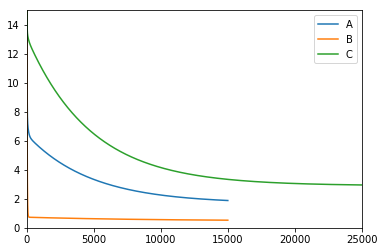

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

##
## Datos originales
##
x = np.array([[10.67, 14.70],
              [ 9.74, 13.79],
              [10.23, 14.30],
              [11.17, 15.53],
              [10.41, 15.08],
              [10.87,  6.81],
              [11.95,  6.05],
              [12.77,  7.97],
              [14.42,  9.25],
              [13.25,  8.03],
              [13.27, 13.92],
              [14.40, 16.58],
              [14.50, 17.39],
              [14.20, 16.70],
              [14.62, 17.22]])


d = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])


##
## Solución 
## Se codifica un vector para cada clase
##

A = np.array([+1 if x == 0 else -1 for x in d])
B = np.array([+1 if x == 1 else -1 for x in d])
C = np.array([+1 if x == 2 else -1 for x in d])

wA, historyA = adaline(x, A, mu=0.0002, niter=15000)
wB, historyB = adaline(x, B, mu=0.0001, niter=15000)
wC, historyC = adaline(x, C, mu=0.0002, niter=25000)

plt.plot(historyA)
plt.plot(historyB)
plt.plot(historyC);
plt.legend(['A', 'B', 'C']);
plt.xlim(0, 25000)
plt.ylim(0, 15)

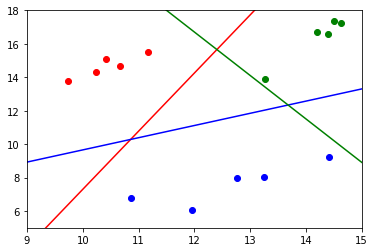

In [129]:
Ax = [e[0]  for (e, y) in zip(x, d) if y == 0]
Ay = [e[1]  for (e, y) in zip(x, d) if y == 0]

Bx = [e[0]  for (e, y) in zip(x, d) if y == 1]
By = [e[1]  for (e, y) in zip(x, d) if y == 1]

Cx = [e[0]  for (e, y) in zip(x, d) if y == 2]
Cy = [e[1]  for (e, y) in zip(x, d) if y == 2]

plt.plot(Ax, Ay, 'ro')
plt.plot(Bx, By, 'bo')
plt.plot(Cx, Cy, 'go')
plt.xlim(9, 15)
plt.ylim(5, 18)

xplot = np.linspace(start=9, stop=15, num=20)
frontera_A = - wA[0] / wA[2] - wA[1] / wA[2] * xplot
frontera_B = - wB[0] / wB[2] - wB[1] / wB[2] * xplot
frontera_C = - wC[0] / wC[2] - wC[1] / wC[2] * xplot

plt.plot(xplot, frontera_A, color='red')
plt.plot(xplot, frontera_B, color='blue')
plt.plot(xplot, frontera_C, color='green');


### Aproximación 2

En este caso también se usan tres ADALINE. La primera determina si el punto pertence a la clase A o al resto. La segunda ADALINE decide si el punto pertence a la clase B o a la clase C.

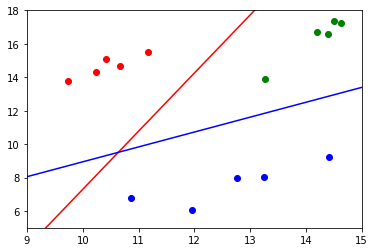

In [132]:
wA, historyA = adaline(x, A, mu=0.0002, niter=15000)
wB, historyB = adaline(x[5:15,:], B[5:15], mu=0.0001, niter=15000)

plt.plot(Ax, Ay, 'ro')
plt.plot(Bx, By, 'bo')
plt.plot(Cx, Cy, 'go')
plt.xlim(9, 15)
plt.ylim(5, 18)

xplot = np.linspace(start=9, stop=15, num=20)
frontera_A = - wA[0] / wA[2] - wA[1] / wA[2] * xplot
frontera_B = - wB[0] / wB[2] - wB[1] / wB[2] * xplot

plt.plot(xplot, frontera_A, color='red')
plt.plot(xplot, frontera_B, color='blue');


---
**Ejercicio.--** Implemente este modelo como una clase usando `numpy`. La implementación usa la regla delta como algoritmo de aprendizaje.

In [142]:
%clear
class Adaline:
    def __init__(self, n):
        """
        n es el numero de entradas a la red 
        """
        pass
    
    def fit(self, x, y, mu=0.01, iter=10):
        """
        x son las entradas, y es la salida esperada
        """
        pass
        
    def predict(self, x):
        """
        Pronostica la salida para una lista de entradas.
        
        >>> x = np.array([[10.67, 14.70],
        ...               [ 9.74, 13.79],
        ...               [10.23, 14.30],
        ...               [11.17, 15.53],
        ...               [10.41, 15.08],
        ...               [10.87,  6.81],
        ...               [11.95,  6.05],
        ...               [12.77,  7.97],
        ...               [14.42,  9.25],
        ...               [13.25,  8.03],
        ...               [13.27, 13.92],
        ...               [14.40, 16.58],
        ...               [14.50, 17.39],
        ...               [14.20, 16.70],
        ...               [14.62, 17.22]])
        >>> d = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
        >>> y = np.array([+1 if x == 0 else -1 for x in d])
        >>> m = Adaline(2)
        >>> m.fit(x, y)
        >>> m.predict(x)
        [ 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
       
        """
        pass
    
if __name__ == "__main__":
    import doctest
    doctest.testmod()

**********************************************************************
File "__main__", line 29, in __main__.Adaline.predict
Failed example:
    m.predict(x)
Expected:
    [ 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
Got nothing
**********************************************************************
1 items had failures:
   1 of   6 in __main__.Adaline.predict
***Test Failed*** 1 failures.


---
**Ejercicio.--** Realice la misma implementación del ejercicio anterior usando `TensorFlow`.

---

Clasificación
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/deep-neural-nets/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/deep-neural-nets/tree/master/) para explorar el repositorio usando `nbviewer`. 